**AUTHOR:**  

**Nabiel Husein Shihab**   
- email: nabielshihab@hotmail.com  
- Linkedin: https://www.linkedin.com/in/nabiel-shihab/    
- GitHub: https://github.com/nabielshihab 

**Import Packages / Libraries**  
It is a common practice to import all necessary packages and place user-defined functions at the beginning of the file.

In [1]:
# for machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# user-defined packages
from packages.eda import *
from packages.evaluation import *

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

**User-defined Function(s)**

In [2]:
def build_ann_model(units):
    """
    Build ANN model

    Parameters:
    -----------
    units: {int} number of nodes in ANN layers

    Returns:
    --------
    nn_model: {keras.engine.sequential.Sequential} compiled ANN model
    """
    
    nn_model = Sequential([
            Dense(units, activation='relu', input_dim=X_train.shape[1]),
            Dropout(.1),
            Dense(units, activation='relu'),
            Dropout(.1),
            Dense(1, activation='sigmoid',),
        ])
    
    return nn_model

# The Problem Statement

**The Goal**  
A lending company that we are partnering with wanted us to **predict credit risk.**

**Why is it important?**  
Because it could tell lenders and other creditors whether a loan will end up being fully paid or charged off. Therefore, these predictions would be very useful to investors in determining whether or not to invest.  

# The Analytical Approaches

As the goal requires us to make some predictions, we need to approach it using **predictive analytics**. In other words, we are going to deal with a machine learning model, or models(?) However, it does not mean that we will not take other approaches into account. For example, we can still perform some descriptive analytics to help us gain knowledge about the data.

# The Data

We have a CSV-formatted dataset. It comprises the funded loans data only since they did not provide us the rejected loans dataset. There are columns related to identification numbers, some are related to the borrower / co-borrowers' personal information, some are loan-specific, some columns related to the borrower / co-borrowers' credit / public records, and other columns.

## Data Loading

It's time to read the CSV-formated loan dataset.

In [3]:
# read the dataset
df = pd.read_csv('dataset/loan_data.csv')

As we have loaded our data, it is better to observe it at a high level. We can use the ***`pandas' info`*** method to obtain some information about it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235332 entries, 0 to 235331
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    235332 non-null  int64  
 1   loan_amnt                    235332 non-null  int64  
 2   term                         235332 non-null  object 
 3   int_rate                     235332 non-null  float64
 4   installment                  235332 non-null  float64
 5   grade                        235332 non-null  object 
 6   sub_grade                    235332 non-null  object 
 7   emp_title                    222068 non-null  object 
 8   emp_length                   226189 non-null  object 
 9   home_ownership               235332 non-null  object 
 10  annual_inc                   235332 non-null  float64
 11  verification_status          235332 non-null  object 
 12  issue_d                      235332 non-null  object 
 13 

> From the dataframe and the info above, we can see that:
> - we have got **235,332  samples (rows)** and **37 features (columns)** in our dataset,   
> - we have multiple types of data, and  
> - there are many columns consist of null values

To get a better understanding about the features, we can read the data dictionary below.

## Data Dictionary

The descriptions of the variables are taken from the data dictionary from the Lending Club. Here is the list of the descriptions.

**Columns that are related to IDs**  
> - `member_id` : A unique LC assigned Id for the borrower member.

**Columns related to the borrower / co-borrowers' personal information**
> - `emp_title` : The job title supplied by the borrower when applying for the loan. 
> - `emp_length` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. In the dataset, we have 10 classifications (excluding nan), namely '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'.
> - `home_ownership` : The home ownership status provided by the borrower during registration. 
> - `annual_inc` : The self-reported annual income provided by the borrower during registration.
> - `zip_code` : The first 3 numbers of the zip code provided by the borrower in the loan application.
> - `addr_state` : The state provided by the borrower in the loan application.

**Columns that are loan-specific**
> - `loan_amnt` : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
> - `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `int_rate` : interest rate on the loan.
> - `installment` : The monthly payment owed by the borrower if the loan originates.
> - `grade` : LC assigned loan grade.  
> - `sub_grade` : LC assigned loan subgrade.  
> - `issue_d` : The month which the loan was funded.  
> - `loan_status` : The current status of the loan.  
> - `purpose` : A category provided by the borrower for the loan request.  
> - `recoveries` : post charge off recoveries.  
> - `next_pymnt_d` : Next scheduled payment date.  


**Columns related to the borrower / co-borrowers' credit / public records**  
> - `verification_status` : Indicates if income was verified by LC, not verified, or if the income source was verified.   
> - `dti` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
> - `delinq_2yrs` : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.  
> - `earliest_cr_line` : The month the borrower's earliest reported credit line was opened.  
> - `inq_last_6mths` : The number of inquiries in past 6 months (excluding auto and mortgage inquiries).  
> - `mths_since_last_delinq` : The number of months since the borrower’s last delinquency.  
> - `mths_since_last_record` : The number of months since the last public record.  
> - `open_acc` : The number of open credit lines in the borrower's credit file.  
> - `pub_rec` : The number of derogatory public records. A derogatory public record is a type of negative item on your credit report. The higher the number, the lower the borrower's credit score.  
> - `revol_bal` : Total credit revolving balance.  
> - `revol_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  
> - `total_acc` : The total number of credit lines currently in the borrower's credit file.  
> - `collections_12_mths_ex_med` : Number of collections in 12 months excluding medical collections.  
> - `mths_since_last_major_derog` : Months since most recent 90-day or worse rating.
> - `acc_now_delinq` : The number of accounts on which the borrower is now delinquent.  
> - `total_col_amnt` : The total collection amounts ever owed.   
> - `total_cur_bal` : The total current balance of all accounts.  
> - `total_rev_hi_lim` : The total revolving high credit/credit limit.  

**Others**
> - `policy_code` : Publicly available policy_code=1. New products not publicly available policy_code=2.  

# Data Preparation

We need to ensure that our data is clean and is in a suitable form so our logic is provided with usable data. No matter how good our logic is, if the input data is incorrect, the results will not be reliable! Just like George Fuechsel, an early IBM programmer and instructor, said  
*`"Garbage In, Garbage Out!"`*

Here is the list of some potential issues that we need to consider:
- Unnecessary samples
- Duplicate rows (if any)
- Irrelevant features 
- The possibility of data leakage
- The practicability (number of null values, number of unique values, etc.)
- The relationship with other features
- Incorrect data types
- Bad-formatted values
- Categorical variables
- Incomplete yet useful features

apart from them, we can also add new features in this step.

## Drop Unnecessary Samples

The first thing to do when we are cleaning our data is to make sure that we are working with correct samples. 

Our goal is to predict credit risk. In other words, we need to predict whether the approved loan will end up being fully paid or charged off. Yet, we can see that there are other loan status categories beside those two. 

,# Samples,Percentage
loan_status,,
Fully Paid,184739,78.501436
Charged Off,42475,18.048969
Late (31-120 days),6900,2.932028
Late (16-30 days),1218,0.517567


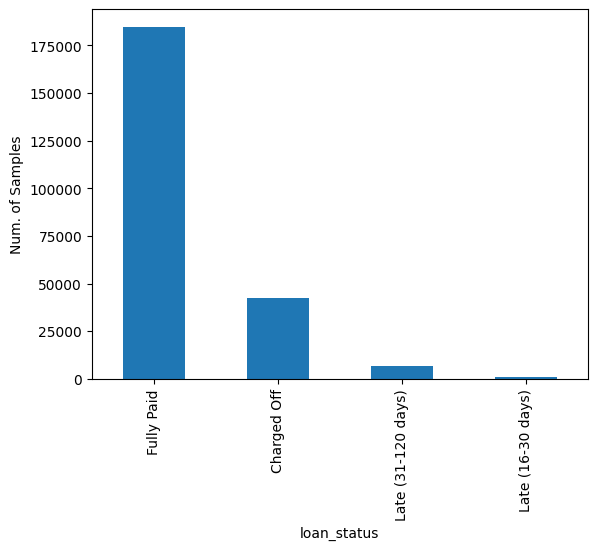

In [5]:
# show the categories of loan_status
check_portion(df, 'loan_status')

Our categories of interest would only be the Fully Paid and the Charged Off categories. They will be our target feature / label when we train our machine learning models. 

In [6]:
# keep only Fully Paid and Charged Off loans
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

**Check the current number of samples**  
It is important to know the number of samples before we carry out any analyses.

In [7]:
print(f'Current num. of samples: {df.shape[0]:,}')

Current num. of samples: 227,214


**Check the percentage of each Label**  
It is also important to check the portion of each label.

,# Samples,Percentage
loan_status,,
Fully Paid,184739,81.30617
Charged Off,42475,18.69383


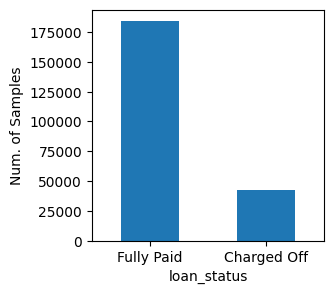

In [8]:
check_portion(df, 'loan_status', figsize=(3,3), rot=0)

Here we can see that we have a moderate degree of imbalanced dataset, i.e. the proportion of the minority class is within the range of 1-20% of the data set. We need to consider this when we create our model.

## Find out Duplicates

Now, we will sort out any duplicates, if any. We can use ***`pandas' duplicated`*** method to find them.

In [9]:
# find duplicate rows
print('# duplicate rows:', df[df.duplicated()].shape[0]) 

# duplicate rows: 0


It seems that we don't have any duplicate rows.  
But still, we need to worry whether there are duplicate member IDs since one person is not allowed to have more than one IDs.

In [10]:
# find duplicate rows (subset member_id)
print('# duplicate member IDs:', df[df[["member_id"]].duplicated()].shape[0]) 

# duplicate member IDs: 0


Yeah, we don't need to worry about duplicates!

## Feature Selection

At this point, we will keep / drop some features based on:
- the relevancy to our target feature
- the possibility of a data leakage
- the practicability
- the number of non-null values
- the number of unique values
- the relationship with other features

**Irrelevant Features**  

We classify features as irrelevant when we know that they have nothing to do with the target feature. Thus, they will not have any contribution when it comes to making predictions. That is why we should exclude them. 

The `member_id` has nothing to do with the borrowers' ability / willingness to pay the loan. Thus we will drop them.

**Data-leakage-leading Features**  

Some features which will not be existed when the loan has not been issued could lead us to data leakage. For example, `recoveries` is related to charged-off loans only and they won't be available at the time of the funding decision. In consequence, our model would easily predict loans with `recoveries` value of 0 as a 'Fully Paid' loans. But, all loans will have `recoveries` value of 0 at the beginning. Therefore, we need to exclude it.

**Impractical Features**  

The `emp_title` will be excluded because of its impracticability, even though some roles are paid higher than the others and some companies pay higher than the others and they could affect the credit risk assessment. However, these columns have way too many unique texts without clear classifications. Thus, they will not be usable for our further analyses. In addition, we already have the annual income information in the dataset.

**Null-containing Features**  

Now, we will observe the number of NaN (null) values in each column. It would be easier to show only the null-containing columns and their associated number as well as the portion of null values, and sort them in descending order. 

In [11]:
# show null-containing columns
show_null_containings(df)

,Percentage of Nulls
next_pymnt_d,100.000000
mths_since_last_record,88.273170
mths_since_last_major_derog,82.387529
mths_since_last_delinq,56.360524
tot_coll_amt,28.038765
tot_cur_bal,28.038765
total_rev_hi_lim,28.038765
emp_title,5.590765
emp_length,3.817106
revol_util,0.081861


For now, we will drop `next_pyment_d`column which have null values of 100%. We will work on the remaining null-containing columns later on.

**One-unique-containing Features**  

Features with only one unique value cannot be analyzed and will not be useful when it comes to building a model. Those features are listed below.  

In [12]:
show_one_unique_containings(df)

,Num of Unique Values
policy_code,1


**Drop Features**  
Now, it's time to drop the unnecessary features.

In [13]:
# list of columns to drop
cols_to_drop = [
   'member_id',
   'recoveries', 
   'emp_title',
   'next_pymnt_d', 
   'policy_code', 
]

# drop those columns
df = df.drop(cols_to_drop, axis=1)

**Highly Correlated Features**  

One of the best ways to figure out the correlation between variables is using the correlation matrix. Now, let's extract pairs of features which have correlation coefficient greater than or equal to the desired threshold (absolute 0.8).

,feature_1,feature_2,CC
0,loan_amnt,installment,0.955769
1,revol_bal,total_rev_hi_lim,0.826965


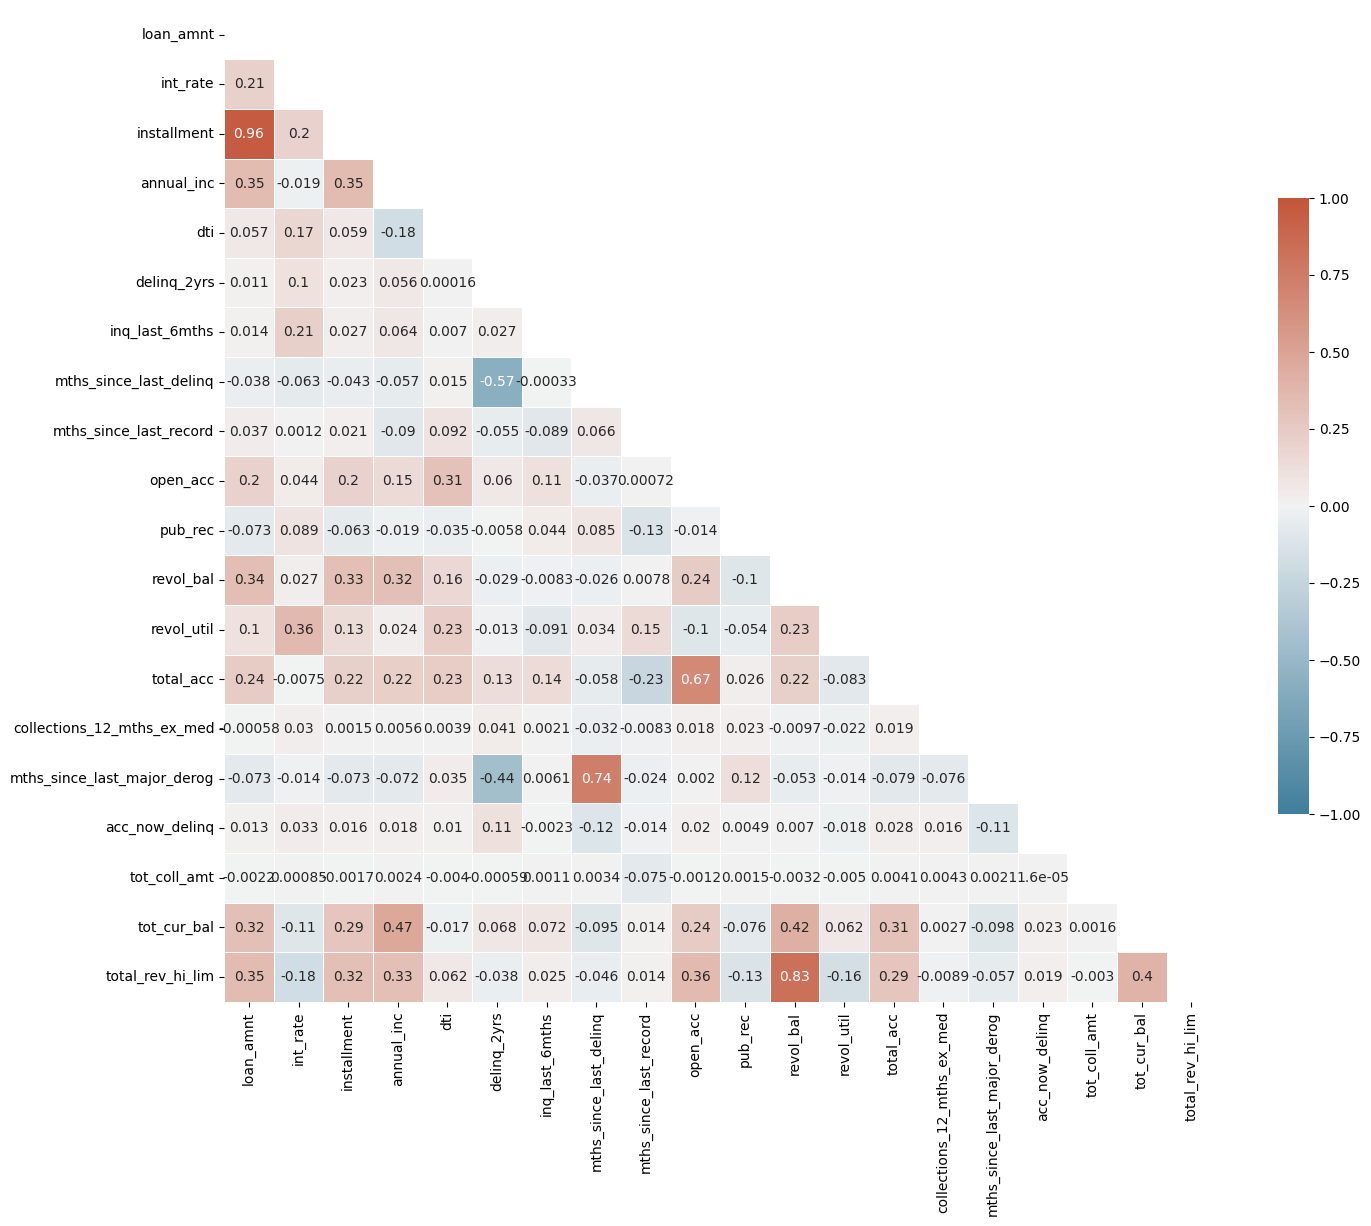

In [14]:
# CC threshold
threshold = .8

# correlation matrix dataframe (only include numerical columns)
corrMatrix = df.select_dtypes(include=np.number).corr()

# plot correlation matrix
plot_corr_matrix(corrMatrix, annot=True, figsize=(16,16))

# highly correlated features
df_highcorr = high_cc_features(corrMatrix, threshold)
df_highcorr

It seems that we have some highly correlated features. 
- The `loan_amnt` and `installment` columns :  strong positive correlation (CC of 0.96). 
- The `revol_bal` and `total_rev_hi_lim` columns :  strong positive correlation (CC of 0.83).  

We will drop the `installment` and the `total_rev_hi_lim` columns. Moreover, the `sub_grade` column will be removed since we have already had the `grade` column. We determined to continue with the `grade` instead of the `sub_grade` column because the `grade` column has fewer number of categories. Thus, when we encode it using One-hot encoder, we will not get too many dummy features.

In [15]:
# list of columns to drop
cols_to_drop = [
    # highly correlated features
    'installment',
    'total_rev_hi_lim',
    'sub_grade',
]

# drop the highly correlated features
df = df.drop(cols_to_drop, axis=1)

## Tidy Up some Features

Before we handle the incomplete yet useful features, we have to tidy up some features.
- some features have incorrect data types
- some are categorical and need to be encoded
- some have bad-formatted values

**Fix data type**  
We need to convert the data types of the `issue_d` and `earliest_cr_line` columns from python object (str in this context) to datetime.

In [16]:
df[['issue_d', 'earliest_cr_line']].dtypes

issue_d             object
earliest_cr_line    object
dtype: object

In [17]:
# convert to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

WARNING! Function `strptime` can  parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068. Source: https://docs.python.org/3/library/time.html

Let's see how it affects our data!

In [18]:
# check the years
df['issue_d'].dt.year.sort_values()

37567     2007
37629     2007
37628     2007
37627     2007
37626     2007
          ... 
186459    2014
186460    2014
186461    2014
186445    2014
235331    2014
Name: issue_d, Length: 227214, dtype: int32

In [19]:
# check the years
df['earliest_cr_line'].dt.year.sort_values()

24621     1969
48602     1969
192695    1969
196051    1969
224691    1969
          ... 
156724    2068
70116     2068
69933     2068
97296     2068
176009    2068
Name: earliest_cr_line, Length: 227214, dtype: int32

As we expected, it seems that we have got some data from the future in the `earliest_cr_line`.  
Let's send them back to their true century of origin!

In [20]:
# extract the years, months, and days
years = df['earliest_cr_line'].dt.year
months = df['earliest_cr_line'].dt.month
days = df['earliest_cr_line'].dt.day

# subtract the years with 100
years[years>2011] = years[years>2011]-100

# update the dataframe
df['earliest_cr_line'] = pd.to_datetime(pd.DataFrame({'year':years, 'month':months, 'day':days}))

**Encode categorical variables**  
For the algorithm's sake, we need to encode some variables using LabelEncoder (if they have ordinal values), while the others using OneHotEncoder. In addition, we will manually label-encode the `emp_length` column. For EDA visualization, we will preserve the original columns. But, we will drop them when building machine learning models.  
Here is the list of the features and their associated encoding methods:
- Label encoding : `term` , `grade`, `emp_length`
- One-hot encoding : `home_ownership`, `verification_status`, `purpose`

In [21]:
# Label encoding
le = LabelEncoder()
df['le_term'] = le.fit_transform(df['term'])
df['le_grade'] = le.fit_transform(df['grade'])

# One-hot encoding
cols_one_hot = ['purpose', 'home_ownership', 'verification_status']
df_temp = df[cols_one_hot]
df = pd.get_dummies(df, columns=cols_one_hot, drop_first=True)
df = pd.concat([df, df_temp], axis=1)

# manually label encode the emp_length column.
dict_replacing = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}
df['le_emp_length'] = df['emp_length'].map(dict_replacing)

**Bad-formatted values**  
We just need to extract the first 3 characters of the `zip_code` column.

In [22]:
df['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    852xx
Name: zip_code, dtype: object

In [23]:
# get the first 3 chars
df['zip_code'] = df['zip_code'].str.slice(0, 3)

## Preprocess Incomplete yet Useful Features

It is worth noting that we are not allowed to have null-containing features as input to our machine learning algorithms, even if they only have 1 null value.

In [24]:
# show the remaining null-containing features
show_null_containings(df)

,Percentage of Nulls
mths_since_last_record,88.273170
mths_since_last_major_derog,82.387529
mths_since_last_delinq,56.360524
tot_coll_amt,28.038765
tot_cur_bal,28.038765
emp_length,3.817106
le_emp_length,3.817106
revol_util,0.081861
collections_12_mths_ex_med,0.024646


To get rid of them, we have several options:
> **- Simply drop the columns**   
> It could be a good choice when we are sure that those columns are not important. Unfortunately, we cannot drop the remaining null-containing columns since we have already dropped the unnecessary columns, and we think that the remaining columns are useful for making predictions.   
> **- Deleting rows that have NaN values**  
> This could be a good choice if the number of null values is insignificant compared to the number of samples. But, we need to be careful when dropping some rows because we will lose some information. Moreover, if we have an imbalanced dataset, removing some samples in the minority class would make it worse. For us now, deleting null samples of `emp_length`, `revol_util`, and `collections_12_mths_ex_med` only reduces our sample size by a small amount. In addition, deleting `tot_coll_amt` and `tot_cur_bal` columns won't really change the proportion of the loan status. Thus, it wouldn't be a big deal.  
> **- Imputing null values with specific values**  
> We can fill the nans with a specific value such as 0 or with a special metric like mean, median or mode. Yet, this is a very naive approach. At this point, we have 3 columns related to the number of months since something happened, namely `mths_since_last_record`, `mths_since_last_major_derog`, and `mths_since_last_delinq`. If we take `mths_since_last_record` as an example, we could assume that the cause of the missing values is because the borrower has never had a public record. Hence, the nan values might not be truly missing data. They are missing not at random and non-ignorable. That being said, we will fill those null values, for each column, with the maximum value plus 1.   
> **- Imputing null values using a specific method (multivariate analysis).**  
> We can impute those null values using a machine learning model. This is a good and efficient way of imputing the null values. The rows with non-null values are used to train a machine learning model and the rows with null values are predicted using that trained model. Actually, we can experiment to impute the `tot_coll_amt` and `tot_cur_bal` columns using this method, but for now we will just simply drop the null rows. 

In [25]:
# columns to drop
cols_to_drop = ['emp_length', 'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal'] 

# drop null rows
df.dropna(subset=cols_to_drop, inplace=True)

# columns of months since something happened 
col_mths = ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']

# fill null values by max value+1
for col in col_mths:
    val = df[col].max()
    idx = df[df[col].isna()].index
    df.loc[idx, col] = val + 1

There shouldn't be any null-containing features anymore. Let's check!

In [26]:
show_null_containings(df)

,Percentage of Nulls


It's better to check the number of samples as well as the proportion of the loan status categories after dropping some rows.

,# Samples,Percentage
loan_status,,
Fully Paid,126115,80.504931
Charged Off,30540,19.495069


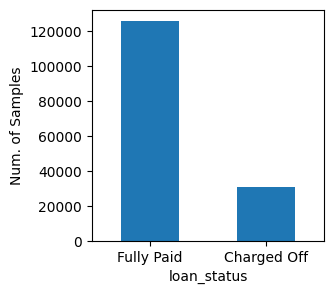

In [27]:
check_portion(df, 'loan_status', figsize=(3,3), rot=0)

## Add New Features 

**Credit lineage**  
It is one of the factors to calculate the FICO SCORE. In other words, it is used to calculate the credit risk. We can obtain it by calculating the week difference between `issue_d` and `earliest_cr_line`.

In [28]:
# add 'cr_lineage' column
df['cr_lineage'] = round((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'W'))

**Is Fully Paid?**

We will give 'Fully Paid' loans a value of 1 and 'Charged' loans a value of 0. This column will be our label / target feature when we are training our machine learning models. Even though we have already had the `loan_status` column, we will not us it for training our machine learning models. We will only use it for plot labeling in exploratory data analysis step.

In [29]:
# replacing dictionary
dict_replacing = {
    'Fully Paid': 1, 
    'Charged Off': 0,
}

# update column
df['is_fully_paid'] = df['loan_status'].map(dict_replacing)

## Reset Index

The last thing before we carry out further analyses is we need to reset our dataframe's index. Just to ensure we will not encounter any unnecessary future errors.

In [30]:
df.reset_index(drop=True, inplace=True)

## Machine Learning Data

At this point, we have prepared our data and we end up with this dataset. 

In [31]:
df

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,zip_code,addr_state,...,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose,home_ownership,verification_status,le_emp_length,cr_lineage,is_fully_paid
0,12000,36 months,13.53,B,10+ years,40000.0,2013-12-01,Fully Paid,871,NM,...,False,True,True,False,debt_consolidation,RENT,Source Verified,10.0,791.0,1
1,3000,36 months,12.85,B,10+ years,25000.0,2013-12-01,Fully Paid,322,FL,...,False,True,False,True,debt_consolidation,RENT,Verified,10.0,1179.0,1
2,28000,36 months,7.62,A,5 years,325000.0,2013-12-01,Fully Paid,945,CA,...,False,False,True,False,debt_consolidation,MORTGAGE,Source Verified,5.0,996.0,1
3,24000,36 months,13.53,B,10+ years,100000.0,2013-12-01,Fully Paid,493,MI,...,False,False,False,True,credit_card,MORTGAGE,Verified,10.0,1300.0,1
4,15000,36 months,14.47,C,10+ years,98000.0,2013-12-01,Fully Paid,117,NY,...,False,True,False,False,debt_consolidation,RENT,Not Verified,10.0,1118.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156650,8525,60 months,18.25,D,5 years,37536.0,2014-01-01,Charged Off,011,MA,...,False,False,False,True,medical,MORTGAGE,Verified,5.0,1000.0,0
156651,18000,36 months,7.90,A,3 years,90000.0,2014-01-01,Charged Off,212,MD,...,False,True,False,True,debt_consolidation,RENT,Verified,3.0,809.0,0
156652,10000,36 months,18.25,D,10+ years,42000.0,2014-01-01,Fully Paid,201,VA,...,False,True,True,False,vacation,RENT,Source Verified,10.0,605.0,1
156653,22000,60 months,19.97,D,10+ years,78000.0,2014-01-01,Charged Off,377,TN,...,False,False,False,True,debt_consolidation,MORTGAGE,Verified,10.0,865.0,0


We currently have 156,655 rows and 54 columns. Even though we preserved all the original columns, all of them will not be used for building models since we have encoded them. They will come in handy when it comes to EDA visualization. Yet, for building machine learning models, we will exclude them. 

In [32]:
# non-machine learning columns (will not be used when building machine learning models)
cols_nonml = ['issue_d', 'loan_status', 'zip_code', 'addr_state', 'earliest_cr_line', 'purpose', 'home_ownership', 'verification_status', 'term', 'grade', 'emp_length']
target = 'is_fully_paid'

# machine learning dataframe
df_ml = df.drop(cols_nonml, axis=1)
df_ml

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,le_emp_length,cr_lineage,is_fully_paid
0,12000,13.53,40000.0,16.94,0.0,0.0,53.0,33.0,7.0,2.0,...,False,False,False,False,True,True,False,10.0,791.0,1
1,3000,12.85,25000.0,24.68,0.0,0.0,58.0,53.0,5.0,2.0,...,False,False,False,False,True,False,True,10.0,1179.0,1
2,28000,7.62,325000.0,18.55,0.0,1.0,153.0,122.0,15.0,0.0,...,True,False,False,False,False,True,False,5.0,996.0,1
3,24000,13.53,100000.0,22.18,0.0,0.0,153.0,122.0,14.0,0.0,...,True,False,False,False,False,False,True,10.0,1300.0,1
4,15000,14.47,98000.0,6.15,0.0,2.0,153.0,122.0,16.0,0.0,...,False,False,False,False,True,False,False,10.0,1118.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156650,8525,18.25,37536.0,12.28,4.0,0.0,3.0,122.0,12.0,0.0,...,True,False,False,False,False,False,True,5.0,1000.0,0
156651,18000,7.90,90000.0,10.33,1.0,0.0,14.0,122.0,16.0,0.0,...,False,False,False,False,True,False,True,3.0,809.0,0
156652,10000,18.25,42000.0,11.57,0.0,0.0,29.0,122.0,9.0,0.0,...,False,False,False,False,True,True,False,10.0,605.0,1
156653,22000,19.97,78000.0,18.45,0.0,5.0,153.0,116.0,18.0,1.0,...,True,False,False,False,False,False,True,10.0,865.0,0


## Train-Test Splitting

First thing first, we need to split the data into train dataset (80%) and test dataset (20%). Keep in mind that we have a moderately imbalanced dataset. We certainy want to avoid having the train dataset with 100% fully paid loans and having the test dataset with 100% of charged off loans. Thus, we must ensure that the proportion of the loan status in the train as well as in the test datasets are the same. The scikit-learn's `stratify` argument in the `train_test_split` method will help us do that. 

In [33]:
# train-test split
df_train, df_test = train_test_split(df_ml, test_size=.2, stratify=df_ml[target], random_state=11)
X_train, y_train = df_train.drop(target, axis=1), df_train[[target]]
X_test, y_test = df_test.drop(target, axis=1), df_test[[target]]

## Feature scaling

**When to Apply Feature Scaling**
- Distance-Based Algorithms: K-nearest neighbors (KNN), K-means clustering.
- Gradient-Based Algorithms: Linear regression, logistic regression, neural networks.
- Principal Component Analysis (PCA): As it is sensitive to the variances of the features.

**Importance of Feature Scaling**

- Improves Model Performance: Ensures that all features contribute equally to the result, preventing dominance by features with larger ranges.
- Accelerates Convergence: Helps gradient-based algorithms to converge faster by providing a smoother and more stable optimization landscape.
- Enhances Interpretability: Makes the model coefficients more interpretable by putting all features on a similar scale.


**Key Methods of Feature Scaling**
> **Min-Max Scaling (Normalization)**  
> Rescales the data to a fixed range, usually 0 to 1.
> 
> $X{_{scaled}} = \frac{X{_i} - X{_{min}}} {X{_{max}} - X{_{min}}}$
>
> **Standardization (Z-score Normalization)**  
> Rescales the data to have a mean of 0 and a standard deviation of 1.
>
> $X{_{scaled}} = \frac{X{_i} - \mu} {\sigma}$
>
> where $\mu$ = mean and $\sigma$ = standard deviation


For now, we will use standradization to rescale features.

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

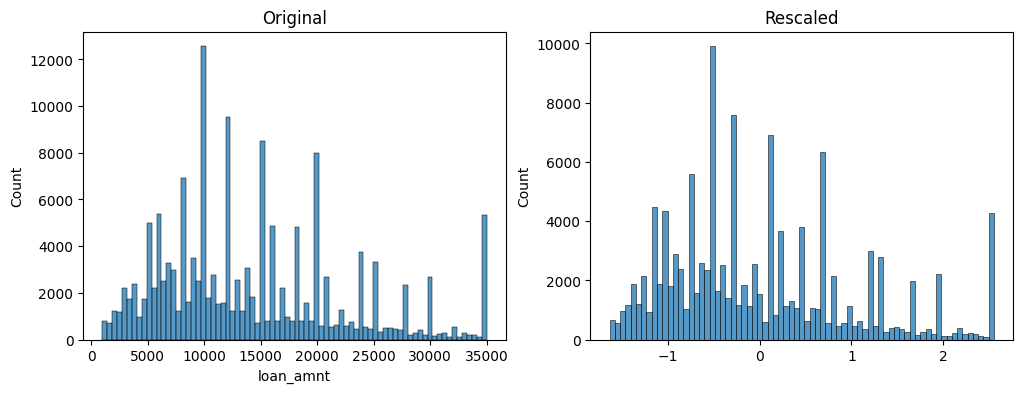

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(data=df_ml, x='loan_amnt', ax=axes[0])
axes[0].set_title('Original')
sns.histplot(X_train[:, 0], ax=axes[1])
axes[1].set_title('Rescaled')
fig.show()

# Modeling 

It's time to create machine learning models! To predict the credit risk, we will compare 3 models:
1. Trivial model
2. Artificial Neural Network (ANN)
3. Fine-tuned ANN

**Class Weighting**  
Before moving on, remember that we are dealing with an imbalanced dataset. So, giving each class a weight would increase our model performance. Going forward, the weights below will be used. In addition, we will try other combinations of weights for comparison when we are tuning the hyperparameters.

In [36]:
# label distribution (train set)
pos = np.count_nonzero(y_train)
neg = len(y_train) - pos
total = neg + pos

# class weightings
weight_for_0 = round((1/neg)*total/2.0, 2)
weight_for_1 = round((1/pos)*total/2.0, 2)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 2.56
Weight for class 1: 0.62


## Trivial Model

Before we make some machine learning models, sometimes it is good to have a trivial model as a comparison. Here, we just simply predict all loans in the training and test datasets as fully paid loans (the majority of the class). Then, we will calculate the model performance metrics.

True Positives	:  25223
True Negatives	:  0
False Positives	:  6108
False Negatives	:  0


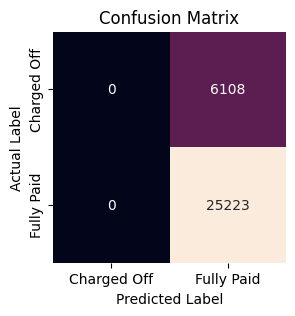

In [37]:
# "predicted" values
y_trivial_train = np.array([1]*df_train.shape[0]) 
y_trivial_test = np.array([1]*df_test.shape[0])

# confusion matrix (test set)
cm = confusion_matrix(y_test, y_trivial_test)
plot_cm(cm)

With this trivial model, we only have true positives and false positives. Hence, the accuracy and the precision score will be the same. Yet, it's different with the recall and balanced accuracy scores. Let's calculate those scores!

In [38]:
# metric scores (test set)
accuracy = accuracy_score(y_test, y_trivial_test)
precision = precision_score(y_test, y_trivial_test)
recall = recall_score(y_test, y_trivial_test)

print('Metric scores for our trivial model (test set):') 
print(f'- Accuracy\t\t: {round(accuracy*100,2)}%')
print(f'- Precision\t\t: {round(precision*100,2)}%')
print(f'- Recall\t\t: {round(recall*100,2)}%')

Metric scores for our trivial model (test set):
- Accuracy		: 80.5%
- Precision		: 80.5%
- Recall		: 100.0%


The accuracy score is high. But, it is not a good metric to use when we are dealing with imbalanced dataset. On the other hand, if we stick to the recall score, our trivial model is already perfect. So, we don't need to waste our time going further. However, since we predicted all loans as fully paid, it is not surprising to get the recall score of 100%. That's because the recall tells us the portion of the predicted fully paid loans out of the total actual fully paid loans. The problem is, it doesn't take into account the amount of false positives, i.e. the loans that are predicted as fully paid but actually charged off. Thus, to measure how good our model is, we will use the precision score since we want to consider the false positives.  

Before we create models, creating a dataframe to record all models' metric scores will be useful. The dataframe will be used to compare the performance of all models and will come in handy when it comes to determining the best model.

In [39]:
# initiate a dataframe of metric scores
metrics = ['Train Precision', 'Test Precision']
df_scores = pd.DataFrame(columns=['Model']+metrics)

# append trivial model's scores to the dataframe
trivial_scores = get_scores(y_train, y_trivial_train, y_test, y_trivial_test)
df_scores = append_scores(df_scores, model_name='Trivial', scores=trivial_scores)
df_scores

,Model,Train Precision,Test Precision
0,Trivial,0.805049,0.805049


## Artificial Neural Network (ANN)

**How Does ANN Work?**

The information from the dataset will be entered into the network via the input neurons, which triggers the hidden neuron layers, and this will arrive at the output neurons. 

<img src="assets/ANN.png" width="700"/>

Not all neurons are "triggered" all the time. Each neuron receives input from the left neuron, and the input is multiplied by the weight of the connection it passes through. Each neuron adds up all the inputs it receives and if the sum is more than a certain threshold value, the neuron is “triggered” and triggers the neuron it is connected to (the neuron to the right of it).


**How Does ANN "Learn"?**

Chollet (2018) states that the training of the ANN model revolves around the following objects:
1. Layers, which are combined into a network or model,
2. Appropriate input and target data,
3. Loss function, the quantity that will be minimized during the model learning process takes place,
4. Optimizer, determines how the model will be updated based on the loss function. Optimizer implements specific variant of stochastic gradient descent (SGD)

<img src="assets/ANN_workflow.png" width="400"/>  

The image above illustrates the relationship between the four objects. The model, which consists of several layers connected to each other, maps the input data into predictions. Then the loss function will compare the prediction with the target, resulting in a loss value, a measure of how well the model prediction matches what is expected. The optimizer uses the loss value to update the weights in the model.

**TENSORFLOW & KERAS**

<img src="assets/tensorflow.png" width="500"/> <img src="assets/keras.png" width="400"/>

we can use deep learning framework to make it easier to solve problems using deep learning. `TensorFlow is one of the frameworks for deep learning. While Keras is a library in Python that can work on the TensorFlow framework`. In simple terms Keras is the "wrapper" of TensorFlow. Keras is there to make it easier for us because Keras can be said to be more high-level than TensorFlow. 

**Now, let's create and train ANN models**

This time, We will have 4 layers, namely: 
> 1. **input layer**, consists of 42 input units (num of features)  
> 2. **first hidden layer**, it has 32 hidden units with Relu activation function  
> 3. **second hidden layer**, it has 32 hidden units with Relu activation function  
> 4. **output layer**, it has 1 output unit with Sigmoid activation function  


The characteristics of our model:
> - Using **binary crossentropy loss function** to calculate the loss score between the predicted label and the observed label during the training process  
> - Using **Adam optimizer** (one of the SGD methods) to update the weights  
> - Precision metric will be used to evaluate our model  
> - We will try to set the number of hidden layer units to 32  
> - We are using batch size of 1024 and number of epochs of 150.  
> - We will split 20% of the training data to be validation data.  

To train the model, we just need to call `fit` method. 

In [40]:
nn_model_1 = KerasClassifier(
    model=build_ann_model, 
    optimizer=Adam(learning_rate=1e-3), 
    loss='binary_crossentropy', 
    metrics=['precision'], 
    units=32, 
    epochs=150, 
    batch_size=1024,
    validation_split=0.2,
    verbose=1,
    random_state=0)


# nn_model_1 = build_ann_model(units=32)
# nn_model_1.summary()

In [41]:
%%time
nn_model_1.fit(X_train, y_train)

Epoch 1/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5763 - precision: 0.8120 - val_loss: 0.4607 - val_precision: 0.8103
Epoch 2/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4690 - precision: 0.8116 - val_loss: 0.4558 - val_precision: 0.8082
Epoch 3/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4626 - precision: 0.8098 - val_loss: 0.4538 - val_precision: 0.8077
Epoch 4/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4599 - precision: 0.8084 - val_loss: 0.4525 - val_precision: 0.8077
Epoch 5/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4579 - precision: 0.8083 - val_loss: 0.4519 - val_precision: 0.8074
Epoch 6/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4561 - precision: 0.8080 - val_loss: 0.4512 - val_precision: 0.8070
Epoch 7/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4559 - precision: 0.8071 - val_loss: 0.4508 - val_precision: 0.8071
Epoch 8/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4542 - precision: 0.8075 - val_loss:

KerasClassifier(
	model=<function build_ann_model at 0x000002C582EAF060>
	build_fn=None
	warm_start=False
	random_state=0
	optimizer=<keras.src.optimizers.adam.Adam object at 0x000002C5830A5C70>
	loss=binary_crossentropy
	metrics=['precision']
	batch_size=1024
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=150
	units=32
	class_weight=None
)

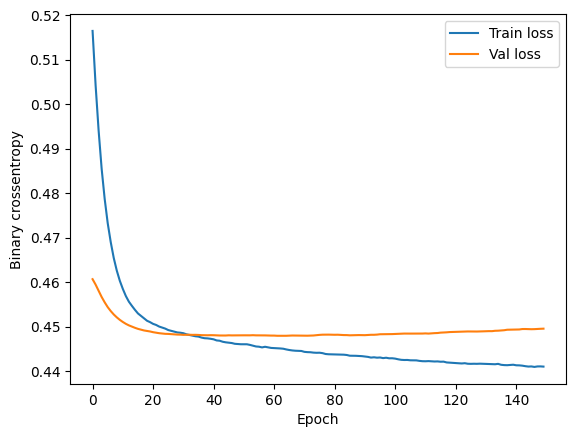

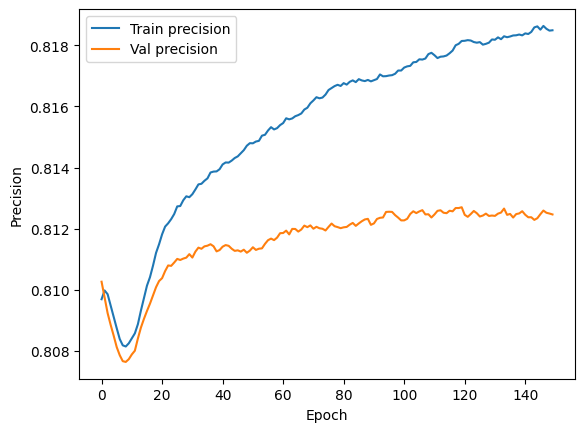

In [42]:
plot_loss(nn_model_1)
plot_metric(nn_model_1, metric='precision')

From the plots above, we can tell that at epoch 40, we have an overfitting issue. Thus, it indicates that we don't need to train our model more than 40 epochs. Let's evaluate our model using the test dataset and compare it with previous models.

In [43]:
# make predictions
y_train_pred = nn_model_1.predict(X_train)
y_test_pred = nn_model_1.predict(X_test)

# setting threshold / cut off to transform probability values into binary values
y_train_pred = (y_train_pred > 0.5)
y_test_pred = (y_test_pred > 0.5)

# get scores
ann_1_scores = get_scores(y_train, y_train_pred, y_test, y_test_pred)

# append scores
df_scores = append_scores(df_scores, model_name='ANN 1', scores=ann_1_scores)

df_scores

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Model,Train Precision,Test Precision
0,Trivial,0.805049,0.805049
1,ANN 1,0.815181,0.812063


## Fine-tuned ANN

**Grid Search (Stratified) K-Fold Cross Validation**

The scikit-learn's `GridSearchCV` method will help us determining the best hyperparameters for our models. Basically, it does two things:
1. Apply a grid search to an array of hyperparameters
2. Cross-validate our model using k-fold cross validation

Since we are dealing with an imbalanced dataset, we need a stratified k-fold cross validation algorithm instead of the standard k-fold cross validation. Fortunately, `GridSearchCV` method provides it. Quoted from the scikit-klearn documentation, "for integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used.".   
Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
%%time

# set up the hyperparameters
hyperparameters = {
    'model__units': [16, 24],
    'batch_size': [2048, 4096],
    'epochs': [40],
    }

# nn model
estimator = KerasClassifier(
    model=build_ann_model, 
    optimizer=Adam(learning_rate=1e-3), 
    loss='binary_crossentropy', 
    metrics=['precision'], 
    random_state=0,
    verbose=1
)

grid_search = GridSearchCV(estimator=estimator,
                           param_grid=hyperparameters,
                           scoring='precision',
                           cv=3)

grid_search = grid_search.fit(X_train, y_train, class_weight=class_weight)

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7043 - precision_2: 0.8301
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6607 - precision_2: 0.8676
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6523 - precision_2: 0.8720
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6447 - precision_2: 0.8755
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6428 - precision_2: 0.8795
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6401 - precision_2: 0.8796
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6375 - precision_2: 0.8816
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6367 - precision_2: 0.8819
Epoch 9/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6350 - precision_2: 0.8838
Epoch 10/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6330 - precision_2: 0.8844
Epoch 11/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6331 - precision_2: 0.8850
Epoch 12/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# get the best hyperparameters 
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# display the scores
grid_search_results = pd.DataFrame(grid_search.cv_results_['params'])
grid_search_results['mean_test_score'] =  grid_search.cv_results_['mean_test_score']
display(grid_search_results.sort_values('mean_test_score', ascending=False))

Predict the test dataset using the best estimator based on GridSearchCV.

In [ ]:
# the best model
nn_model_2 = grid_search.best_estimator_ 

# make predictions
y_train_pred = nn_model_2.predict(X_train)
y_test_pred = nn_model_2.predict(X_test)

# setting threshold / cut off to transform probability values into binary values
y_train_pred = (y_train_pred > 0.5)
y_test_pred = (y_test_pred > 0.5)

# get scores
ann_2_scores = get_scores(y_train, y_train_pred, y_test, y_test_pred)

# append scores
df_scores = append_scores(df_scores, model_name='ANN 2', scores=ann_2_scores)

df_scores

# Model Evaluation

In [ ]:
# making confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plot_cm(cm, labels=['Charged Off', 'Fully Paid'])

Even though we have a high precision score, we still have many false negatives. However, in our case now, it's more acceptable to have low false positives and have high false negatives rather than the other way around. In other words, it is more acceptable to mistakenly predict fully paid loans as charged off loans rather than to mistakenly predict the charged off loans as fully paid loans.

# Summary and Conclusions

We have done several things to prepare our data; dropping unnecessary samples, selecting relevant features, fixing bad-formatted features, performing data imputation to fill up null values, and adding new features. All of that just to ensure that our data is suitable and usable for building machine learning models. To predict the credit risk, we have built some machine learning models. We have also compared all the models and we ended up with the ANN 2 model as our best model. Our model has a precision score of 89% on the test dataset. However, even though we have a high precision score, we still have many false negatives. But, it is more acceptable to mistakenly predict fully paid loans as charged off loans rather than to mistakenly predict the charged off loans as fully paid loans. We can try these things to improve our model performance:

- Changing the category of target feature. We chose only fully paid loans and charged off loans as our positive and negative outcomes, respectively. We could consider other loan status categories to be involved.  
- Do more and more feature engineering
- Try different hyperparameter combinations or even different models and compare them.
- etc.

There is still a big room for improvement and that's what science is all about. It is an iterative process that requires experimentation and testing to find the best combination of features, parameters, and models for a given problem.

With that being said and done, we hope this notebook can be beneficial to the readers. We realize that it is not perfect. So, corrections and constructive comments are highly appreciated! Thanks for reading!

**REFERENCE(S):**

Some excellent sources of information:

- https://daniellecrumley.github.io/LendingClubProject/
- https://datagy.io/sklearn-gridsearchcv/
- Chollet, F. (2018): Deep learning with Python, Manning Publication